In [324]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

os.chdir("/Users/rt/PycharmProjects/PixAdapt/csv files/hill climb")

In [260]:
change_name = lambda df : df.rename(columns = {"Unnamed: 0": "epoch"})

img_1 = change_name(pd.read_csv("IMG_1.csv"))
img_2 = change_name(pd.read_csv("IMG_2.csv"))
img_3 = change_name(pd.read_csv("IMG_3.csv"))
img_4 = change_name(pd.read_csv("IMG_4.csv"))
img_5 = change_name(pd.read_csv("IMG_5.csv"))

images_GA = [img_1, img_2, img_3, img_4, img_5]

upper = 33.46 + 0.4
lower = 33.45 - 0.4

In [420]:
os.chdir("/Users/rt/PycharmProjects/PixAdapt")

def plot1(df, img_name, folder_name, idx):
    fig, ax = plt.subplots()
    line, = ax.plot(df["epoch"], df["fitness"], label ="Image", c = 'blue')
    ax.fill_between(df["epoch"], upper, lower, color='lightblue', alpha=0.3)
    ax.scatter(df["epoch"].iloc[idx], df["fitness"].iloc[idx], c = "red")

    colors = ["red"]
    texts = ["Convergence point"]
    patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i],
                label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]

    acceptable_range = mpatches.Patch(color='lightblue', label='Acceptable range')

    lines = [line, acceptable_range, patches[0]]

    ax.legend(handles = lines)
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Fitness score")
    ax.set_title(f"Fitness score for {img_name}")
    plt.savefig(f"analysis/{folder_name}/{img_name}.png")
    plt.show()

In [421]:
def change_df(df):
    df["fit_diff"] = abs(df["fitness"] - 33.46)
    thresh, idxs = 100000, []
    for idx, val in enumerate(df["fit_diff"].values.tolist()):
        if val < thresh:
            idxs.append(idx)
            thresh = val
    return df.iloc[idxs]

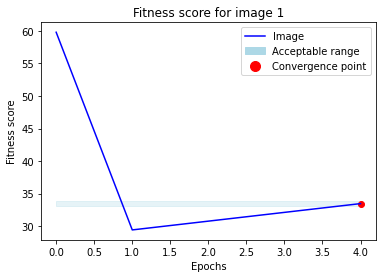

In [422]:
img_1_GA_seq = change_df(img_1)
plot1(img_1_GA_seq, "image 1", "GA", -1)

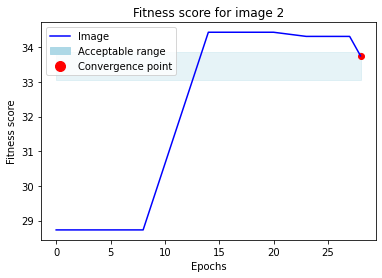

In [423]:
img_2_GA_seq = change_df(img_2)
plot1(img_2_GA_seq, "image 2", "GA", -1)

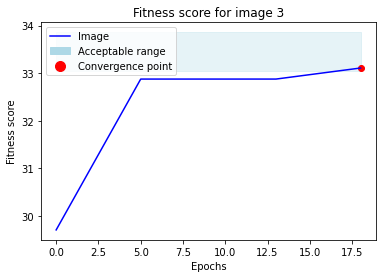

In [424]:
img_3_GA_seq = change_df(img_3)
plot1(img_3_GA_seq, "image 3", "GA", -1)

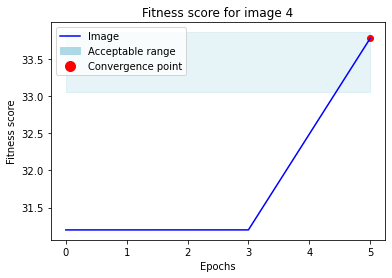

In [425]:
img_4_GA_seq = change_df(img_4)
plot1(img_4_GA_seq, "image 4", "GA", -1)

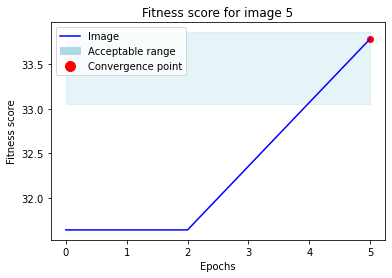

In [426]:
img_5_GA_seq = change_df(img_5)
plot1(img_5_GA_seq, "image 5", "GA", -1)

In [427]:
os.chdir("/Users/rt/PycharmProjects/PixAdapt/csv files/Simulated annealing")

img_1_SA = change_name(pd.read_csv("IMG_1.csv"))
img_2_SA = change_name(pd.read_csv("IMG_2.csv"))
img_3_SA = change_name(pd.read_csv("IMG_3.csv"))
img_4_SA = change_name(pd.read_csv("IMG_4.csv"))
img_5_SA = change_name(pd.read_csv("IMG_5.csv"))

os.chdir("/Users/rt/PycharmProjects/PixAdapt")

images_SA = [img_1_SA, img_2_SA, img_3_SA, img_4_SA, img_5_SA]

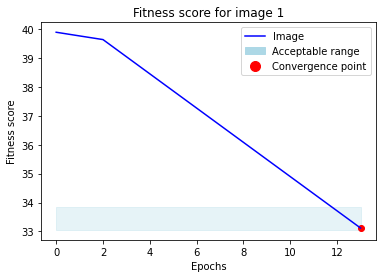

In [428]:
img_1_SA_seq = change_df(img_1_SA)
plot1(img_1_SA_seq, "image 1", "SA", -1)

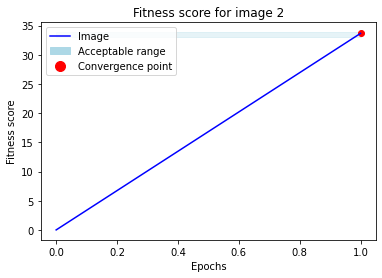

In [429]:
img_2_SA_seq = change_df(img_2_SA)
plot1(img_2_SA_seq, "image 2", "SA", -1)

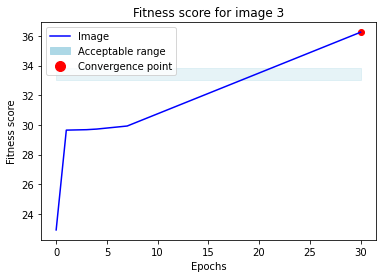

In [430]:
img_3_SA_seq = change_df(img_3_SA)
plot1(img_3_SA_seq, "image 3", "SA", -1)

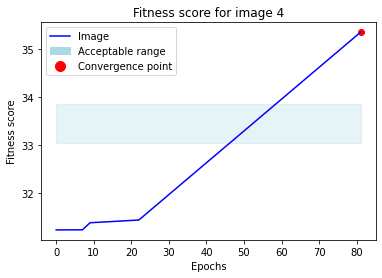

In [431]:
img_4_SA_seq = change_df(img_4_SA)
plot1(img_4_SA_seq, "image 4", "SA", -1)

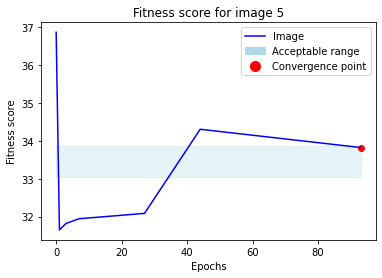

In [432]:
img_5_SA_seq = change_df(img_5_SA)
plot1(img_5_SA_seq, "image 5", "SA", -1)

In [274]:
img_1_SA_seq

,epoch,log_map_seed,log_map_r,log_map_on,lfsr_seed,lfsr_on,rossler_c,rossler_on,tent_map_seed,tent_map_r,tent_on,henon_map_x_seed,henon_map_y_seed,henon_map_a,henon_on,fitness,fit_diff
0,0,0.010000,3.600000,0,0,0,9.000000,1,0.010000,0.010000,0,0.010000,0.010000,1.000000,1,39.901075,6.441075
1,1,0.125563,3.688721,1,4,0,8.889055,1,0.142252,0.094539,0,0.248992,0.057457,1.092581,0,39.773534,6.313534
2,2,0.147502,3.786204,1,5,0,9.112331,1,0.282011,0.184295,0,0.863163,0.822839,1.189647,1,39.646715,6.186715
13,13,0.557670,0.946176,1,77,0,10.677481,0,0.112642,0.341987,0,0.886322,0.832501,0.927561,1,33.115989,0.344011


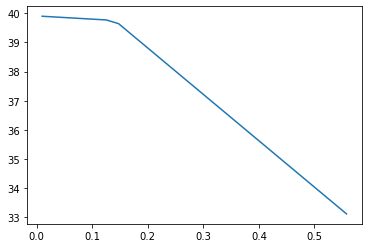

In [275]:
plt.plot(img_1_SA_seq['log_map_seed'], img_1_SA_seq["fitness"])

In [276]:
cols = list(img_1_SA_seq.columns)

In [277]:
print(cols)

['epoch', 'log_map_seed', 'log_map_r', 'log_map_on', 'lfsr_seed', 'lfsr_on', 'rossler_c', 'rossler_on', 'tent_map_seed', 'tent_map_r', 'tent_on', 'henon_map_x_seed', 'henon_map_y_seed', 'henon_map_a', 'henon_on', 'fitness', 'fit_diff']


In [403]:
def plot2(dfs):
    temp = []
    legends = []
    lines = []
    fig, ax = plt.subplots()

    param = "henon_map_a"
    param_on = "henon_on"
    title = "Henon map a seed values vs UACI"
    xlabel_ = 'a'
    fig_name = "GA/henon_map_a.png"

    for n, df in enumerate(dfs):
        PARAM = df[param]
        PARAM_ON = df[param_on]

        fitness = df["fitness"]
        temp.extend(PARAM)
        line, = ax.plot(PARAM, fitness, label = f'Image {n+1}')
        lines.append(line)
        for i in range(len(PARAM)):
            if PARAM_ON.iloc[i] == 0:
                colour = "red"
            else:
                colour = "green"
            plt.scatter(PARAM.iloc[i], fitness.iloc[i], c = colour)

    colors = ["green", "red"]
    texts = ["ON", "OFF"]
    patches = [ plt.plot([],[], marker="o", ms=10, ls="", mec=None, color=colors[i],
                label="{:s}".format(texts[i]) )[0]  for i in range(len(texts)) ]
    lines.extend(patches)

    acceptable_range = mpatches.Patch(color='lightblue', label='Acceptable range')
    lines.append(acceptable_range)

    ax.legend(handles = lines)
    ax.fill_between([0, 1], upper, lower, color='lightblue', alpha=0.3)
    ax.set_xlabel(xlabel_)
    ax.set_ylabel("UACI")
    ax.set_title(title)
    plt.savefig(f"analysis/{fig_name}")
    plt.plot()

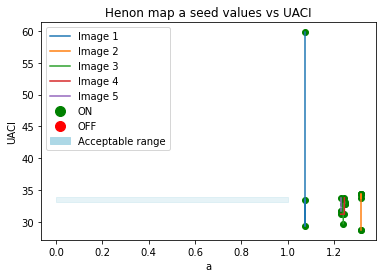

In [404]:
dfs = [img_1_GA_seq, img_2_GA_seq, img_3_GA_seq, img_4_GA_seq, img_5_GA_seq]
plot2(dfs)

In [472]:
os.chdir("/Users/rt/PycharmProjects/PixAdapt/csv files/PA_2")
img_1_PA_2 = change_name(pd.read_csv("IMG_1.csv"))
img_2_PA_2 = change_name(pd.read_csv("IMG_2.csv"))
img_3_PA_2 = change_name(pd.read_csv("IMG_3.csv"))
img_4_PA_2 = change_name(pd.read_csv("IMG_4.csv"))
img_5_PA_2 = change_name(pd.read_csv("IMG_5.csv"))
img_6_PA_2 = change_name(pd.read_csv("IMG_6.csv"))
img_7_PA_2 = change_name(pd.read_csv("IMG_7.csv"))
img_8_PA_2 = change_name(pd.read_csv("IMG_8.csv"))
img_9_PA_2 = change_name(pd.read_csv("IMG_9.csv"))

upper = 33.46 + 1.1
lower = 33.46 - 1.1

os.chdir("/Users/rt/PycharmProjects/PixAdapt")

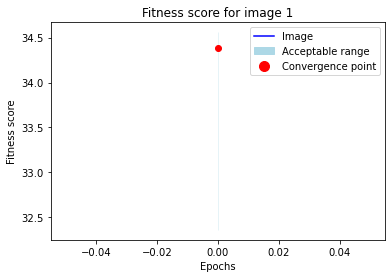

In [473]:
img_1_PA_2_seq = change_df(img_1_PA_2)
plot1(img_1_PA_2_seq, "image 1", "PA_2", -1)

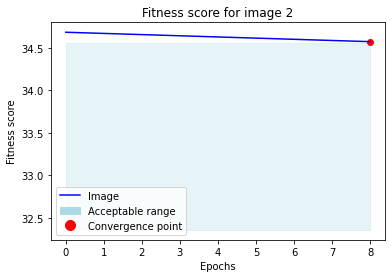

In [474]:
img_2_PA_2_seq = change_df(img_2_PA_2)
plot1(img_2_PA_2_seq, "image 2", "PA_2", -1)

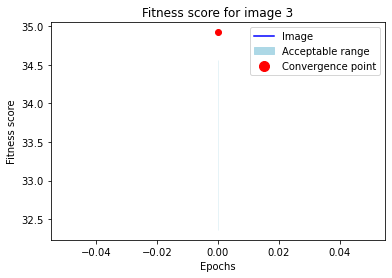

In [475]:
img_3_PA_2_seq = change_df(img_3_PA_2)
plot1(img_3_PA_2_seq, "image 3", "PA_2", -1)

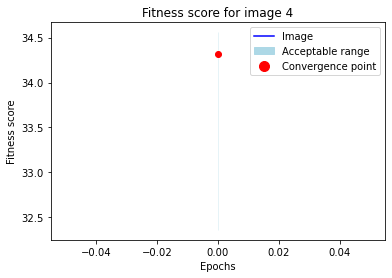

In [476]:
img_4_PA_2_seq = change_df(img_4_PA_2)
plot1(img_4_PA_2_seq, "image 4", "PA_2", -1)

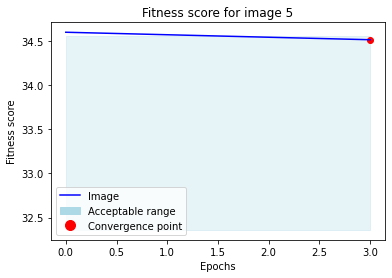

In [477]:
img_5_PA_2_seq = change_df(img_5_PA_2)
plot1(img_5_PA_2_seq, "image 5", "PA_2", -1)

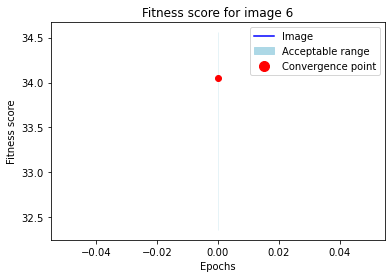

In [478]:
img_6_PA_2_seq = change_df(img_6_PA_2)
plot1(img_6_PA_2_seq, "image 6", "PA_2", -1)

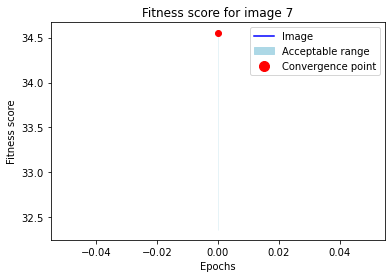

In [479]:
img_7_PA_2_seq = change_df(img_7_PA_2)
plot1(img_7_PA_2_seq, "image 7", "PA_2", -1)

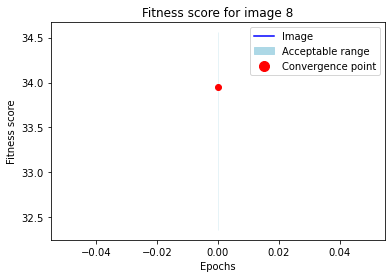

In [480]:
img_8_PA_2_seq = change_df(img_8_PA_2)
plot1(img_8_PA_2_seq, "image 8", "PA_2", -1)

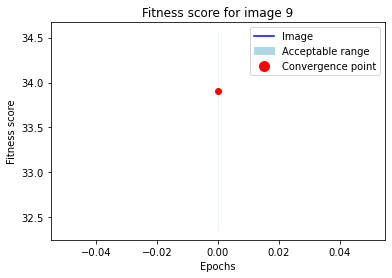

In [481]:
img_9_PA_2_seq = change_df(img_9_PA_2)
plot1(img_9_PA_2_seq, "image 9", "PA_2", -1)

In [512]:
img_5_GA_seq.drop(columns = ["fitness", "fit_diff", "epoch"]).iloc[-1].values.tolist()

[0.2529991714972711,
 3.89601789200077,
 0.0,
 101111.0,
 0.0,
 9.0,
 0.0,
 0.986362476096752,
 1.6348911246127822,
 1.0,
 0.5274343651124074,
 0.3429152007644213,
 1.2294119671353356,
 1.0]

In [501]:
img_1_SA_seq

,epoch,log_map_seed,log_map_r,log_map_on,lfsr_seed,lfsr_on,rossler_c,rossler_on,tent_map_seed,tent_map_r,tent_on,henon_map_x_seed,henon_map_y_seed,henon_map_a,henon_on,fitness,fit_diff
0,0,0.010000,3.600000,0,0,0,9.000000,1,0.010000,0.010000,0,0.010000,0.010000,1.000000,1,39.901075,6.441075
1,1,0.125563,3.688721,1,4,0,8.889055,1,0.142252,0.094539,0,0.248992,0.057457,1.092581,0,39.773534,6.313534
2,2,0.147502,3.786204,1,5,0,9.112331,1,0.282011,0.184295,0,0.863163,0.822839,1.189647,1,39.646715,6.186715
13,13,0.557670,0.946176,1,77,0,10.677481,0,0.112642,0.341987,0,0.886322,0.832501,0.927561,1,33.115989,0.344011
